In [5]:
# importing libraries for logistic regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
# Reading the dataset(csv file)
df = pd.read_csv('binary.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Explorative Data Analysis

### Basic Information

In [7]:
# Basic information about the dataset
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [8]:
# Checking for null values
print(df.isnull().sum())

admit    0
gre      0
gpa      0
rank     0
dtype: int64


In [9]:
# Number of students admitted and not admitted
print(df['admit'].value_counts())

admit
0    273
1    127
Name: count, dtype: int64


In [10]:
# Number of students with rank
print(df['rank'].value_counts().sort_index())

rank
1     61
2    151
3    121
4     67
Name: count, dtype: int64


In [11]:
# Generating cross tabulation table
print(pd.crosstab(df['admit'], df['rank'], rownames=['admit']))

rank    1   2   3   4
admit                
0      28  97  93  55
1      33  54  28  12


### Plotting

array([[<Axes: title={'center': 'admit'}>,
        <Axes: title={'center': 'gre'}>],
       [<Axes: title={'center': 'gpa'}>,
        <Axes: title={'center': 'rank'}>]], dtype=object)

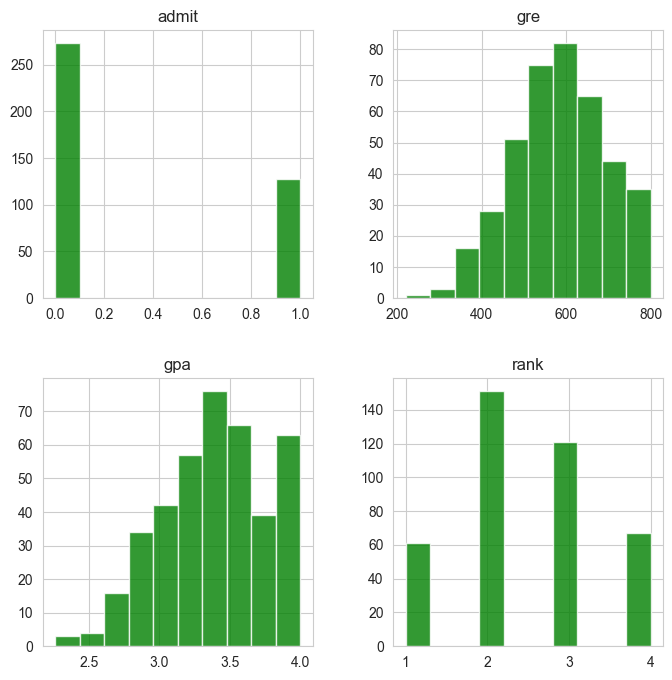

In [12]:
# Setting the seaborn style
sns.set_style('whitegrid')

# Plotting histograms
df.hist(color='g', alpha=0.8, figsize=(8, 8))


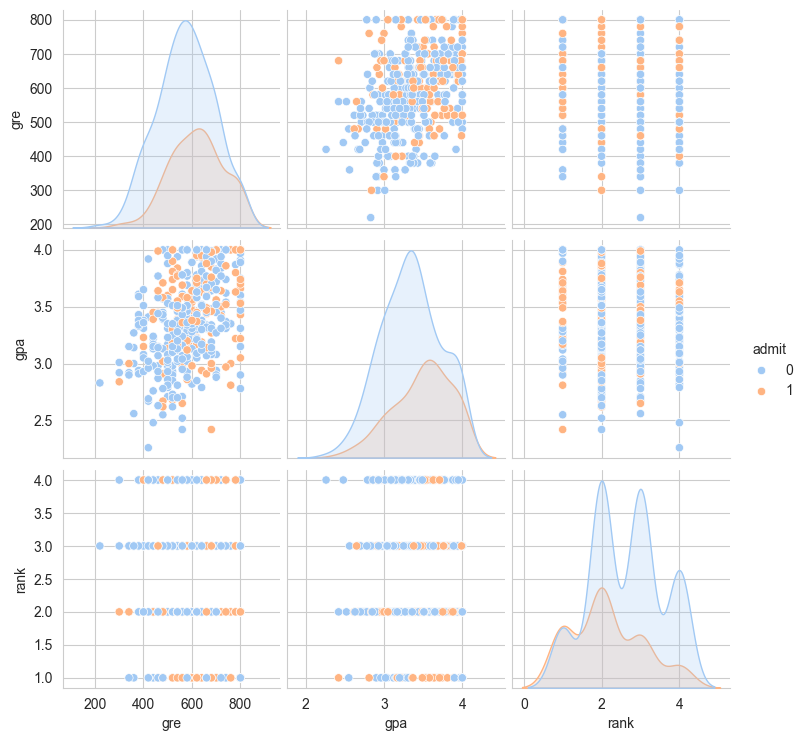

In [13]:
# Pair plot
sns.pairplot(df, hue='admit', palette='pastel')

<Axes: >

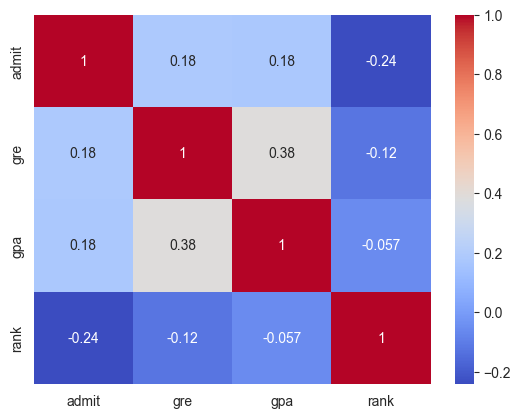

In [14]:
# Correlation matrix
corr = df.corr()
# print(corr)

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Preprocessing

In [15]:
# # One hot encoding for rank column with 0 and 1
# rank = pd.get_dummies(df['rank'])
# # print(rank.head())
# # Converting rank to int64
# rank = rank.astype('int64')
# print(rank.head())

# # Removing columns to rank1, rank2, rank3, rank4
# rank.columns = ['rank1', 'rank2', 'rank3', 'rank4']
# print(rank.head())

# # Concatenating the rank column with the dataframe
# df = pd.concat([df, rank], axis=1)
# print(df.head())

# # Dropping the rank column
# df.drop(['rank'], axis=1, inplace=True)
# print(df.head())


In [16]:
X = df.drop(['admit'], axis=1)
Y = df['admit']

# # MinMaxScaler
# scaler = preprocessing.MinMaxScaler()
# X = scaler.fit_transform(X)
# print(X)

## Logistic Regression

In [17]:
# Logistic regression
# Splitting the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Creating the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

# Predicting the values
Y_pred = logreg.predict(X_test)

# Confusion matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

# Classification report
print(classification_report(Y_test, Y_pred))



[[78  4]
 [30  8]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        82
           1       0.67      0.21      0.32        38

    accuracy                           0.72       120
   macro avg       0.69      0.58      0.57       120
weighted avg       0.70      0.72      0.66       120



In [18]:
# Accuracy
# print(type(Y_test), type(Y_pred))
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred)) # Accuracy:  0.7166666666666667

Accuracy:  0.7166666666666667


In [19]:
# # ploting the ROC curve
# Y_pred_proba = logreg.predict_proba(X_test)[::, 1]
# fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)
# auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
# plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
# plt.legend(loc=4)
# plt.show()

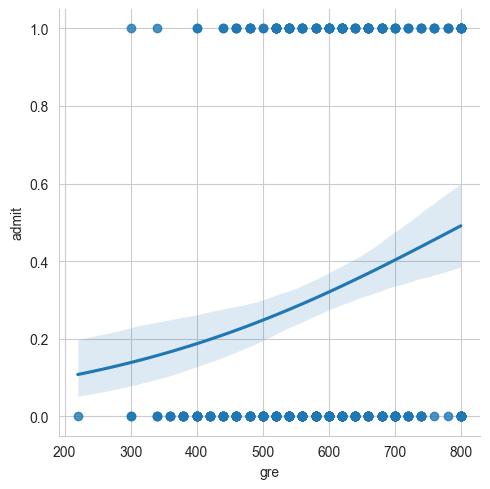

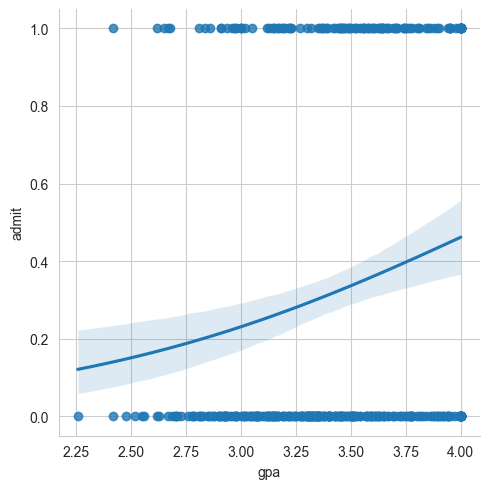

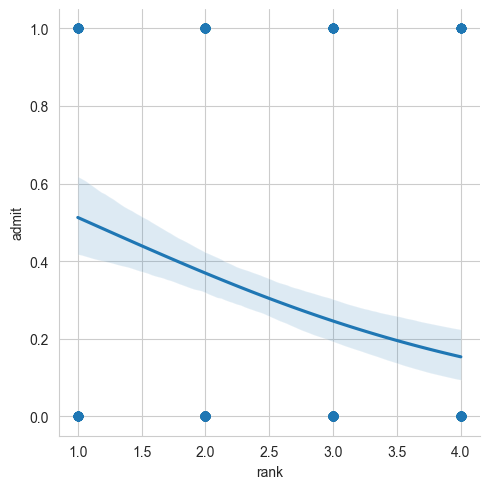

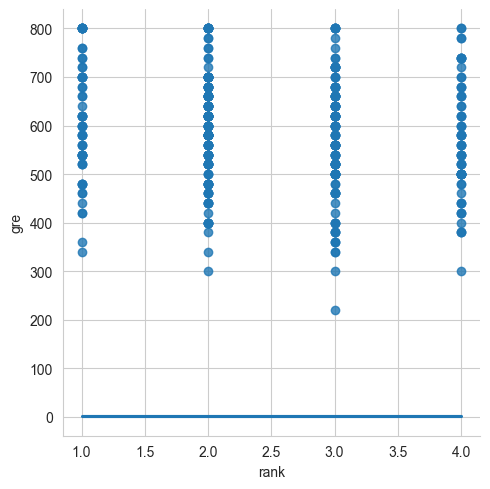

In [21]:
import seaborn as sns
# Plotting the model
sns.lmplot(x='gre', y='admit', data=df, logistic=True)

# Plotting the model
sns.lmplot(x='gpa', y='admit', data=df, logistic=True)

# Plotting the model
sns.lmplot(x='rank', y='admit', data=df, logistic=True)

# Plotting the model
sns.lmplot(x='rank', y='gre', data=df, logistic=True)